# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS
Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
•	Text: The content of the blog post. Column name: Data
•	Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
•	Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria
•	Correct implementation of data preprocessing and feature extraction.
•	Accuracy and robustness of the Naive Bayes classification model.
•	Depth and insightfulness of the sentiment analysis.
•	Clarity and thoroughness of the evaluation and discussion sections.
•	Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the blog posts dataset!



# 1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
df=pd.read_csv("blogs.csv")

In [ ]:
df.head(5)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df["Labels"].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [ ]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
text_data = df['Data']
categories = df['Labels']

In [ ]:
# Text Preprocessing Steps
# Step 1: Remove punctuation and convert text to lowercase
text_data = text_data.apply(lambda x: re.sub(r'[^\w\s]', '', x).lower())

In [ ]:
# Step 2: Tokenize the text data
nltk.download('punkt_tab')
text_data = text_data.apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Step 3: Remove stopwords
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
# Step 4: Join tokens back into a single string for each document
text_data = text_data.apply(lambda tokens: ' '.join(tokens))

In [ ]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(text_data)


# 2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.

In [ ]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, categories, test_size=0.2, random_state=42)

In [ ]:
# Model Training with Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy = model.score(X_test, y_test)
accuracy

0.8225

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.8511951331336539

In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')
recall

0.8225

In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.8148158756580917

# 3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
df=pd.read_csv("blogs.csv")

In [ ]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def filter_sentiment(x):
    sentiment_scores = sentiments.polarity_scores(x)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:

df['sentiment'] = df['Data'].apply(filter_sentiment)

In [ ]:

print(df[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [ ]:

df.head(10)

,Data,Labels,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,Positive
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,Positive
9,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Positive


In [ ]:
#Examine the distribution of sentiments

In [ ]:

sentiment_all = df.groupby(['Labels', 'sentiment']).size().unstack().fillna(0)

In [ ]:
sentiment_all

sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,0.0,79.0
comp.sys.mac.hardware,24.0,3.0,73.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,8.0,85.0
rec.autos,27.0,1.0,72.0
rec.motorcycles,30.0,2.0,68.0


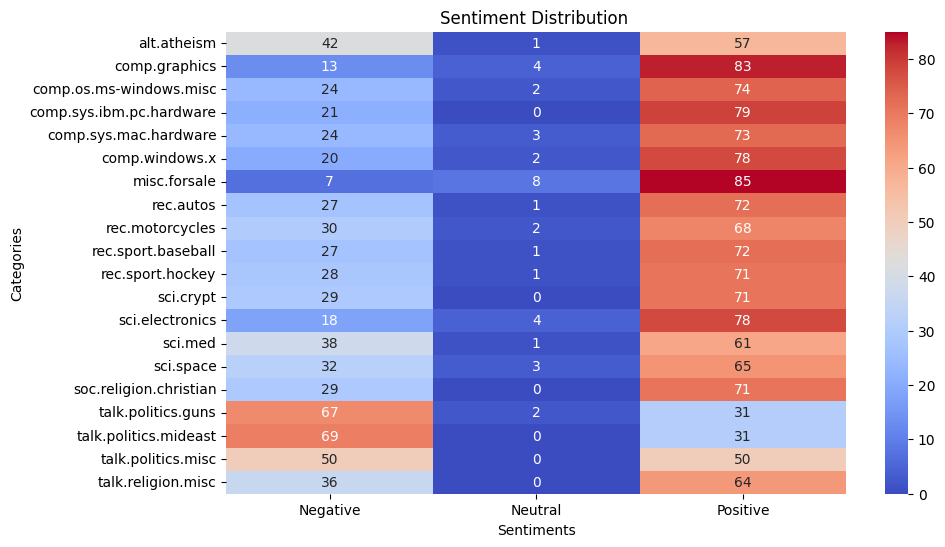

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sentiment_all, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment Distribution ')
plt.ylabel('Categories')
plt.xlabel('Sentiments')
plt.show()

<Axes: >

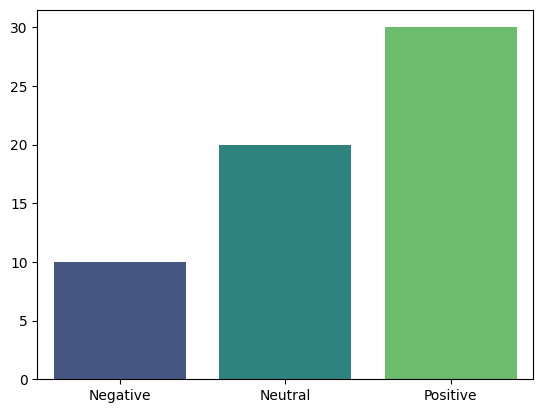

In [ ]:
categories = ['Negative', 'Neutral', 'Positive']
values = [10, 20, 30]

sns.barplot(x=categories, y=values, palette='viridis')